In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture
import numpy as np
from scipy.stats import norm

In [2]:

data = pd.read_csv('lifeInsurance.txt', header = None, sep= '\s+')
data.columns = ['GENDER', 'AGE', 'Marital Status', 'Nmr of children', 'Life Style', 'Chronic Diseases', 'Salary (monthly)', 'Decision']  



In [ ]:
for i in data:
    for atr in data.iloc[i]:
        if i == 0:
            


IndentationError: expected an indented block (3766921127.py, line 3)

Text(2000, 0.5, 'Aparentemente, o salário não quer dizer nada lol')

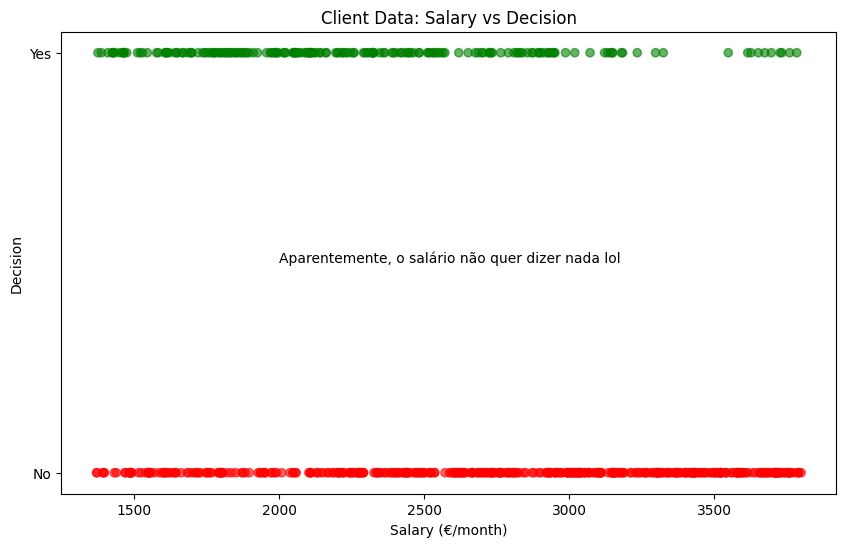

In [3]:
colors = ['red' if dec == 0 else 'green' for dec in data['Decision']]

plt.figure(figsize=(10, 6))
# plt.subplot(1, 2, 1)
plt.scatter(data['Salary (monthly)'],
            data['Decision'],
            color=colors, 
            alpha=0.6, 
            label='Client Data')
plt.xlabel('Salary (€/month)')
plt.ylabel('Decision')
plt.title('Client Data: Salary vs Decision')

plt.yticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.text(2000, 0.5, 'Aparentemente, o salário não quer dizer nada lol', dict(size=10))

# plt.show()


In [11]:
print(data.head())

   GENDER    AGE  Marital Status  Nmr of children  Life Style  \
0     0.0   80.0             1.0              1.0         1.0   
1     0.0  101.0             1.0              3.0         1.0   
2     0.0   34.0             1.0              3.0         1.0   
3     0.0   34.0             0.0              1.0         1.0   
4     0.0   93.0             1.0              2.0         1.0   

   Chronic Diseases  Salary (monthly)  Decision  
0               0.0         2611.4159       0.0  
1               1.0         3132.2018       1.0  
2               1.0         2462.3115       1.0  
3               1.0         3051.9166       0.0  
4               1.0         2401.4440       1.0  


In [12]:
weigths = {
    'AGE': {
        '< 30': 5,
        '30-40': 10,
        '40-50': 15,
        '> 50': 20,
    },
    'Chronic Diseases': {
        '0': 5,
        '1': 10,
        '2': 15
    },
    'Salary (monthly)' : {
        '> 3500': 5,
        '1700-3500': 10,
        '< 1700': 15
    }, 
    'Nmr of children': {
        '0': 5,
        '1': 10,
        '> 1': 15
    }

}

In [13]:
def calculate_score(row):

    score = 0   


    if row['AGE'] < 30:
        score += weigths['AGE']['< 30']
    elif 30 <= row['AGE'] < 40:
        score += weigths['AGE']['30-40']
    elif 40 <= row['AGE'] < 50:
        score += weigths['AGE']['40-50']
    else:
        score += weigths['AGE']['> 50']


    if row['Chronic Diseases'] == 0:
        score += weigths['Chronic Diseases']['0']
    elif row['Chronic Diseases'] == 1:
        score += weigths['Chronic Diseases']['1']
    else:
        score += weigths['Chronic Diseases']['2']


    if row['Salary (monthly)'] <= 1700:
        score += weigths['Salary (monthly)']['< 1700']
    elif 1700 < row['Salary (monthly)'] <= 3500:
        score += weigths['Salary (monthly)']['1700-3500']
    else:
        score += weigths['Salary (monthly)']['> 3500']


    if row['Nmr of children'] == 0:
        score += weigths['Nmr of children']['0']
    elif row['Nmr of children'] == 1:
        score += weigths['Nmr of children']['1']
    else:
        score += weigths['Nmr of children']['> 1']
    
    return score


In [14]:
def bayesian_insurance_decision(dataset):
    # Criar uma cópia do dataset para não modificar o original
    df = dataset.copy()
    
    # Calcular a pontuação para cada pessoa
    df['Score'] = df.apply(calculate_score, axis=1)
    
    # Determinar a decisão com base na pontuação
    df['Predicted Decision'] = df['Score'].apply(lambda x: 'Yes' if x > 50 else 'No')
    
    return df

In [15]:
# EXEMPLO  do deepseek E PARA RETRIRAR !!!


# Para testar, vamos criar um dataset de exemplo
example_data = {
    'GENDER': ['M', 'F', 'M', 'F'],
    'AGE': [25, 35, 45, 55],
    'Marital Status': ['Single', 'Married', 'Divorced', 'Widowed'],
    'Nmr of children': [0, 2, 1, 3],
    'Life Style': ['Active', 'Sedentary', 'Active', 'Sedentary'],
    'Chronic Diseases': [0, 1, 2, 2],
    'Salary (monthly)': [4000, 3000, 2000, 1000],
    'Decision': ['No', 'Yes', 'No', 'Yes']
}

df_example = pd.DataFrame(example_data)
result = bayesian_insurance_decision(df_example)
print(result[['AGE', 'Chronic Diseases', 'Salary (monthly)', 'Nmr of children', 'Score', 'Predicted Decision', 'Decision']])

   AGE  Chronic Diseases  Salary (monthly)  Nmr of children  Score  \
0   25                 0              4000                0     20   
1   35                 1              3000                2     45   
2   45                 2              2000                1     50   
3   55                 2              1000                3     65   

  Predicted Decision Decision  
0                 No       No  
1                 No      Yes  
2                 No       No  
3                Yes      Yes  


In [ ]:
result = bayesian_insurance_decision(data)
print(result)

     GENDER    AGE  Marital Status  Nmr of children  Life Style  \
0       0.0   80.0             1.0              1.0         1.0   
1       0.0  101.0             1.0              3.0         1.0   
2       0.0   34.0             1.0              3.0         1.0   
3       0.0   34.0             0.0              1.0         1.0   
4       0.0   93.0             1.0              2.0         1.0   
..      ...    ...             ...              ...         ...   
595     1.0   34.0             1.0              1.0         2.0   
596     0.0   45.0             1.0              1.0         0.0   
597     0.0   37.0             0.0              3.0         1.0   
598     1.0   73.0             0.0              2.0         1.0   
599     0.0   60.0             1.0              3.0         2.0   

     Chronic Diseases  Salary (monthly)  Decision  Score Predicted Decision  
0                 0.0         2611.4159       0.0     45                 No  
1                 1.0         3132.2018

In [21]:
result['Decision'] = result['Decision'].replace({0.0: 'No', 1.0: 'Yes'})

accuracy = 0

for _, row in result.iterrows():  # Usar iterrows() para iterar sobre as linhas do DataFrame
    if row['Predicted Decision'] == row['Decision']:
        accuracy += 1

print(f"How many correct predictions: {accuracy}")
size = len(result)
print(f"Size: {size}")
print(f"Accuracy: {accuracy / len(result) * 100:.2f}%")

How many correct predictions: 456
Size: 600
Accuracy: 76.00%


In [22]:
print("""Marta, espero que tenhas gostado do código! Se tiveres alguma dúvida ou 
      precisares de mais alguma coisa, é só dizeres. Boa sorte com o teu projeto de IA!""")
print(""" 
lol aquilo foi sugestao do copilot""")
print("""
entao ve se achas fixe. Esta bue simples mas vou ver se arranjo mais maneiras de analisar o os dados
      e melhorar codigo e precisao etc etc """)

Marta, espero que tenhas gostado do código! Se tiveres alguma dúvida ou 
      precisares de mais alguma coisa, é só dizeres. Boa sorte com o teu projeto de IA!
 
lol aquilo foi sugestao do copilot

entao ve se achas fixe. Esta bue simples mas vou ver se arranjo mais maneiras de analisar o os dados
      e melhorar codigo e precisao etc etc 
